# Data Hackerspace 'Midterm'
** 15 points total **

These problems are designed to be a bit different from the previous 'challenge' problems. Instead of instructing you to do something very specific, these problems are more general and approach-driven (like something you'd see on an actual interview, or in a Data Science job).

Thus, the process of completing these problems is just as important as the 'correctness' of the answers. These questions are also a bit more open ended. Make the assumptions that you think are valid, and be sure to **comment in** those assumptions in your code.

* Due Date: **November 29th, 11:59pm. No late Submissions.**
* Credit is given for both accuracy, and a thoughtful algorithmic approach.
* Submit this assignment emailing your completed `*.ipynb` to Tyler using the email we gave you in class (Keep your output!)

## Problem 1: Email Address Matching
** 4 points **

You are given a list of names and a list of email addresses.  How would you automatically assign the 'best' email from the list of emails to the corresponding name from the list of names?

You can find a list of names in `./names.txt` and the list of emails in `./emails.txt`.

Output a list of `(name, email)` tuples for name/email pairs that you think match 'best'.

In [2]:
# This probably won't work in non-*nix operating systems
!head names.txt
!echo
!head emails.txt
import Levenshtein

Mary Williams
Charles Deanna West
Jacob Jessica Andrews
Javier Daisy Sparks
Paula A. Graham
Jasmine Herman
Matthew Foster
Ernest Michael Bowman
Chad Hernandez
Donna Martin

campbell@yahoo.com
ahansen@yahoo.com
jcross@gmail.com
justin.r.moore@hotmail.com
jadams@gmail.com
tgomez@yahoo.com
roth@smith-chen.com
mary.r.anderson@yahoo.com
sabrina.v.conrad@gmail.com
nelson@hotmail.com


In [5]:
def email_matcher(emails_file, names_file):
    with open(names_file, 'r') as f:
        names = []
        for line in f:
            names.append(line)
    with open(emails_file, 'r') as f:
        emails = []
        for line in f:
            emails.append(line)
    matches = []
    email_names = []
    for email in emails:
        email_names.append(email[0: email.index('@')])
    for name in names:
        min = 1000
        max_email = ''
        for index in range(len(email_names)):
            if Levenshtein.distance(name, email_names[index]) < min:
                min = Levenshtein.distance(name, email_names[index])
                max_email = emails[index]
        matches.append((name, max_email))
    return matches
        

email_matcher('emails.txt', 'names.txt')

[('Mary Williams\n', 'mary.williams@gmail.com\n'),
 ('Charles Deanna West\n', 'charles.west@yahoo.com\n'),
 ('Jacob Jessica Andrews\n', 'jacob.s.andrews@gmail.com\n'),
 ('Javier Daisy Sparks\n', 'javier.sparks@gmail.com\n'),
 ('Paula A. Graham\n', 'david.graham@hotmail.com\n'),
 ('Jasmine Herman\n', 'jason.freeman@hotmail.com\n'),
 ('Matthew Foster\n', 'matthew.foster@gmail.com\n'),
 ('Ernest Michael Bowman\n', 'ernest.bowman@gmail.com\n'),
 ('Chad Hernandez\n', 'shernandez@gmail.com\n'),
 ('Donna Martin\n', 'donna.fleming@hotmail.com\n'),
 ('Arthur R. Green\n', 'arthur.r.green@hotmail.com\n'),
 ('Mark Brian Fuller\n', 'carrie.fuller@hotmail.com\n'),
 ('Elizabeth Alice Kelley\n', 'elizabeth.castillo@gmail.com\n'),
 ('Jacqueline J. King\n', 'jacqueline.s.smith@gmail.com\n'),
 ('James Evans\n', 'james.evans@gmail.com\n'),
 ('Janet Carrillo\n', 'laura.carrillo@gmail.com\n'),
 ('Wendy M. Mitchell\n', 'jessica.mitchell@hotmail.com\n'),
 ('Heather Smith\n', 'heather.r.smith@yahoo.com\n'),
 (

## Problem 2: San Francisco City Salaries
** 2 points **

In `Salaries.csv`, you'll find a list of pay data for the public employees of San Francisco City for the years 2011 - 2014

Write a function that will take this data and plot the median pay change by occupation between 2011 and 2014. You can limit your visualization to the top 25 most populous professions.

(Data courtesy of https://www.kaggle.com/kaggle/sf-salaries)

In [2]:
!head Salaries.csv
import matplotlib.pyplot as plt
import pandas as pd
import csv

Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,,567595.43,567595.43,2011,,San Francisco,
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,,326373.19,326373.19,2011,,San Francisco,
6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.0,8601.0,189082.74,,316285.74,316285.74,2011,,San Francisco,
7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426.14,,315981.05,315981.05,2011,,San Francisco,
8,DAVID KUSHNER,DEPUTY DIRECTOR

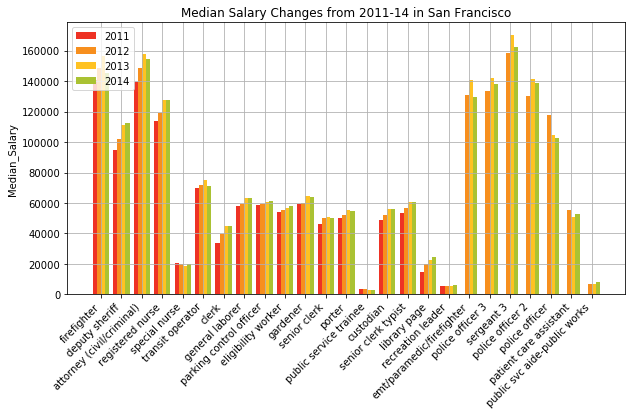

In [66]:
def median_sf_salaries_change(filename):
    jobs = {}
    topjobs = []
    with open(filename) as f:
        csvReader = csv.reader(f)
        for row in csvReader:
            if row[2].lower() in jobs:
                jobs[row[2].lower()] += 1
            else:
                jobs[row[2].lower()] = 1
    for key, value in jobs.items(): 
        if value in sorted(jobs.values())[-25:]:
            topjobs.append(key)
    salaries11 = []
    salaries12 = []
    salaries13 = []
    salaries14 = []
    data_df = pd.DataFrame(columns = ['2011', '2012', '2013', '2014'], index = topjobs)
    for job in topjobs: 
        with open(filename) as f:
            csvReader = csv.reader(f)
            for row in csvReader:
                if row[2].lower() == job:
                    if row[9] == '2011':
                        salaries11.append(float(row[7]))
                    if row[9] == '2012':
                        salaries12.append(float(row[7]))
                    if row[9] == '2013':
                        salaries13.append(float(row[7]))
                    if row[9] == '2014':
                        salaries14.append(float(row[7]))
            if len(salaries11) != 0:
                data_df.at[job, '2011'] = sorted(salaries11)[int(len(salaries11)/2)]
            if len(salaries12) != 0:
                data_df.at[job, '2012'] = sorted(salaries12)[int(len(salaries12)/2)]
            if len(salaries13) != 0:
                data_df.at[job, '2013'] = sorted(salaries13)[int(len(salaries13)/2)]
            if len(salaries14) != 0:
                data_df.at[job, '2014'] = sorted(salaries14)[int(len(salaries14)/2)]
            salaries11 = []
            salaries12 = []
            salaries13 = []
            salaries14 = []
    #format for plotting taken from https://chrisalbon.com/python/matplotlib_grouped_bar_plot.html
    pos = list(range(1,26))
    width = 0.2 
    fig, ax = plt.subplots(figsize=(10,5))
    plt.bar(pos, 
            data_df['2011'], 
            width, 
            color='#EE3224')
    plt.bar([p + width for p in pos], 
            data_df['2012'],
            width,  
            color='#F78F1E') 
    plt.bar([p + width*2 for p in pos], 
            data_df['2013'], 
            width, 
            color='#FFC222') 
    plt.bar([p + width*3 for p in pos], 
            data_df['2014'], 
            width, 
            color='#AAC233') 
    ax.set_ylabel('Median_Salary')
    ax.set_title('Median Salary Changes from 2011-14 in San Francisco')
    ax.set_xticks([p + 1.5 * width for p in pos])
    ax.set_xticklabels(topjobs, rotation = 45, ha = 'right')
    plt.legend(['2011', '2012', '2013','2014'], loc='upper left')
    plt.grid()
    plt.show()

    
median_sf_salaries_change('Salaries.csv')

## Problem 3: Airline Tweets
** 3 points **

Given a dataset of Tweets regarding different airlines (`Tweets.csv`), write a function that returns an ordered list of the most serious complaints against each airline.

**Note:** The sentiment analysis has already been performed, and you are given a sentiment score, complaint label (`negativearesas`), and complaint label confidence markers for each tweet. For maximum accuracy, you may wish to utilize all three of these values in your analysis.

(Data courtesy of https://www.kaggle.com/crowdflower/twitter-airline-sentiment)

In [12]:
!head Tweets.csv

tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
570306133677760513,neutral,1.0,,,Virgin America,,cairdin,,0,@VirginAmerica What @dhepburn said.,,2015-02-24 11:35:52 -0800,,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,,0.0,Virgin America,,jnardino,,0,@VirginAmerica plus you've added commercials to the experience... tacky.,,2015-02-24 11:15:59 -0800,,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,,,Virgin America,,yvonnalynn,,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0,Bad Flight,0.7033,Virgin America,,jnardino,,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",,2015-02-24 11:

In [60]:
def airline_complaints(filename, airline):
    df = pd.DataFrame.from_csv(filename)
    complaints = df[(df.airline == airline) & (df.airline_sentiment == 'negative')
              & (df.airline_sentiment_confidence == 1)
              & (df.negativereason_confidence == 1)].negativereason.tolist()
    prevalence = {}
    for complaint in complaints:
        if complaint in prevalence.keys():
            prevalence[complaint] += 1
        else:
            prevalence[complaint] = 1
    output = []
    sorted_complaints = sorted([(value,key) for (key,value) in prevalence.items()])
    for i in range(len(sorted_complaints)):
        output.append((sorted_complaints)[-1:][0][1])
        sorted_complaints = sorted_complaints[:-1]
    return output

airline_complaints('Tweets.csv', 'American')

['Customer Service Issue',
 'Cancelled Flight',
 'Late Flight',
 'Lost Luggage',
 "Can't Tell",
 'Flight Attendant Complaints',
 'Flight Booking Problems',
 'Bad Flight',
 'longlines',
 'Damaged Luggage']

## Problem 4: City Name Cleaning
** 3 points**

Suppose you have a very large list of the names of all large cities in the world. (Number of records ~= 100,000) Many of these cities will contain common overlapping words like “Mobile”, “Rugby” or “Salmon”. Your task is to automatically (and hopefully quickly) filter out as many of these 'common' words as possible. Output a list of world cities that have these common words removed.

Unfortunately, we don't have a clean list of cities, but rather a `*.csv` file that contains a bunch of other information. You can find this file in `worldcities.csv`

(Data courtesy of https://www.maxmind.com/en/free-world-cities-database)

In [7]:
!tail worldcities.csv

us,wright,Wright,WY,,43.7469444,-105.4700000
us,wyarno,Wyarno,WY,,44.8133333,-106.7733333
us,wycross,Wycross,WY,,41.6805556,-104.1894444
us,wyocolo,Wyocolo,WY,,41.0044444,-106.1719444
us,wyodak,Wyodak,WY,,44.2913889,-105.3791667
us,wyoming,Wyoming,WY,,41.4775000,-105.6361111
us,wyopo,Wyopo,WY,,42.8555556,-108.6886111
us,y-o ranch,Y-O Ranch,WY,,42.0308333,-104.9394444
us,yanceys,Yanceys,WY,,44.9308333,-110.4355556
us,yoder,Yoder,WY,,41.9169444,-104.2952778

In [3]:
def city_name_cleanser(filename):
    city_names = pd.read_csv(filename, encoding='latin-1').City.tolist()
    dict = {}
    for city in city_names:
        for word in city.split(' '):
            if word in dict.keys():
                dict[word] += 1
            else:
                dict[word] = 1
    common = {}
    for key, value in dict.items():
        if value >= 50:
            common[key] = value
    for i in range(len(city_names)):
        new_name = ''
        for word in city_names[i].split(' '):
            if word not in common.keys():
                new_name += word + ' '
        city_names[i] = new_name
    return city_names
city_name_cleanser('worldcities.csv')

['abberley ',
 'abberton ',
 'abberton ',
 'abbess roding ',
 'abbey-cwmhir ',
 'abbey dore ',
 'abbey bathans ',
 'abbey ',
 'abbots ann ',
 'abbots bickington ',
 'abbots bromley ',
 'abbotsbury ',
 'abbotsford ',
 'abbotsham ',
 'abbotskerswell ',
 'abbots langley ',
 'abbots lench ',
 'abbotsley ',
 'abbots ripton ',
 'abbots worthy ',
 'abbotts ann ',
 'abbotts ripton ',
 'aber ',
 'aberaeron ',
 'aberaman ',
 'aberangell ',
 'aberarder ',
 'aberargie ',
 'aber-arth ',
 'aberayron ',
 'aberbargoed ',
 'aberbeeg ',
 'aber-bran ',
 'abercairny ',
 'abercanaid ',
 'abercarn ',
 'abercastle ',
 'aberchalder ',
 'aberchirder ',
 'aberconway ',
 'aber cowarch ',
 'abercynon ',
 'aberdalgie ',
 'aberdare ',
 'aberdaron ',
 'aberdaugleddau ',
 'aberdeen ',
 'aberdeen ',
 'aberdeen ',
 'aberdeen ',
 'aberdeenshire ',
 'aberdour ',
 'aberdour ',
 'aberdovey ',
 'aberdulais ',
 'aberdyfi ',
 'aberearne ',
 'aberedw ',
 'abereiddy ',
 'abererch ',
 'aberfam ',
 'aberfan ',
 'aberfeldy ',
 'ab

## Problem 5: IMDB Crawler
** 3 points **

In an earlier challange problem, you wrote code to take an IMDB page and parse out specific information about the movie and cast.

In this problem, you will go a step further and write a web-scraper to build a database of movie information.

Write a function that takes as an argument a 'seed' URL (guaranteed to be somewhere on www.imdb.com) and crawls the movie links that it finds on that page. You should save the following characteristics about each movie:

* Title
* Rating
* Duration
* Release Date
* Budget

For the sake of time, you can also **limit your crawler to scraping and saving 25 movies.**

The function should save the data to a JSON file.

** Note: ** You're encouraged to separate your code into function(s) that scrape data from IMDB, and function(s) that perform the crawling logic.

In [117]:
from bs4 import BeautifulSoup
import json
import urllib
def imdb_crawler(seed_url, out_file):
    soup = BeautifulSoup(urllib.request.urlopen(seed_url).read(), 'html.parser')
    movies = {}
    i = 0
    for link in soup.find_all('a'):
        if i < 25 and link.get('href') != None and 'title' in link.get('href') and 'search' not in link.get('href') and link.get_text() not in movies.keys() and len(link.get_text().replace(' ','')) != 0:
            i += 1
            movies[link.get_text()] = movie_crawler(seed_url + link.get('href'), link.get_text())
    with open(out_file, 'w') as f:
        json.dump(movies, f, separators = (',\n',': '))

def movie_crawler(imdb_link, title):
    soup = BeautifulSoup(urllib.request.urlopen(imdb_link).read(), 'html.parser')
    attributes = {
        'Title': title.strip(),
        'Rating': '',
        'Duration': '',
        'Release Date': '',
        'Budget': ''
    }
    notAccessed = True
    for link in soup.find_all('span'):
        if link.get('itemprop') == 'ratingValue':
            attributes['Rating'] = link.get_text().strip()
    for link in soup.find_all('time'):
        if link.get('itemprop') == 'duration':
            attributes['Duration'] = link.get_text().strip()
    for link in soup.find_all('meta'):
        if link.get('itemprop') == 'datePublished' and notAccessed:
            notAccessed = False
            attributes['Release Date'] = link.get('content')
    notAccessed = True
    for link in soup.find_all('div', {'class': 'txt-block'}):
        if 'Budget' in link.get_text() and notAccessed:
            notAccessed = False
            money = link.get_text()[9:].strip()
            attributes['Budget'] = money[:money.index(' ')]
    for key, value in attributes.items():
        if value == '':
            attributes[key] = 'Unknown'
    return attributes
            
imdb_crawler('http://www.imdb.com/', 'movies.json')